In [1]:
import pandas as pd
df = pd.read_csv("auto-mpg.csv")
df.head()
df['horsepower'].astype(str).astype(int)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
car name        392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.6+ KB


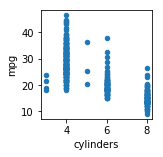

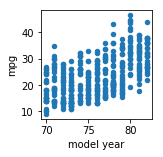

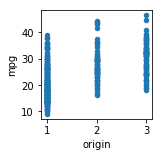

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df.plot(kind='scatter',x='cylinders',y='mpg',figsize=(2,2))
df.plot(kind='scatter',x='model year',y='mpg',figsize=(2,2))
df.plot(kind='scatter',x='origin',y='mpg',figsize=(2,2))

In [7]:
cyl_dummies = pd.get_dummies(df["cylinders"], prefix="cyl")
yr_dummies = pd.get_dummies(df["model year"], prefix="yr")
orig_dummies = pd.get_dummies(df["origin"], prefix="orig")
df = pd.concat([df, cyl_dummies,yr_dummies, orig_dummies], axis=1)
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,cyl_3,...,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82,orig_1,orig_2,orig_3
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0,...,0,0,0,0,0,0,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,cyl_3,cyl_4,...,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82,orig_1,orig_2,orig_3
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,...,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.010204,0.507653,...,0.086735,0.071429,0.091837,0.073980,0.068878,0.071429,0.076531,0.625000,0.173469,0.201531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.100627,0.500580,...,0.281806,0.257869,0.289164,0.262072,0.253569,0.257869,0.266185,0.484742,0.379136,0.401656
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
origin = ["USA", "EU", "EU", "ASIA","USA", "EU", "EU", "ASIA", "ASIA", "USA"]
origin_series = pd.Series(origin)
cat_origin = origin_series.astype('category')
cat_origin

0     USA
1      EU
2      EU
3    ASIA
4     USA
5      EU
6      EU
7    ASIA
8    ASIA
9     USA
dtype: category
Categories (3, object): [ASIA, EU, USA]